<a href="https://colab.research.google.com/github/blackfox2001/bmstu/blob/master/tmo2022/laba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Разведочный анализ данных. Исследование и визуализация данных.**

## **1) Текстовое описание набора данных**

В качестве набора данных мы будем использовать набор с размерной характеристикой чашелистника и лепестков каждого вида ирисов.

Файл содержит следующие колонки:

sepal length (cm) - длина чашелистника (в см).

sepal width (cm) - ширина (в см).

petal length (cm) - длина лепестка (в см).

petal width (cm) - ширина лепестка (в см).

target - целевая характеристика, в нашем случае - один из классов ириса, зашифрованный в числовом значении (Ирис щетинистый, Ирис разноцветный, Ирис виргинский).



### **Импорт библиотек**

Импортируем библиотеки с помощью команды import. 

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### **Загрузка данных**

In [9]:
iris = load_iris()

## **2) Основные характеристики датасета**

Преобразуем в Pandas DataFrame. Объединим целевую характеристику с остальными характеристиками, а также данные. Полученные данные выведем полностью.

In [10]:
frame_ir = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
frame_ir

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Узнаем размерность датасета.

In [14]:
frame_ir.shape

(150, 5)

На основании выведенных данных, понимаем, что записей 150, а столбцов - 5.

In [16]:
total_count = frame_ir.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


Выведем список колонок:

In [18]:
frame_ir.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Выведем список колонок с типами данных:

In [19]:
frame_ir.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

Проверим наличие пустых значений:

In [20]:
for col in frame_ir.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = frame_ir[frame_ir[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


Основные статистические характеристки набора данных:

In [22]:
frame_ir.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Определим уникальные значения для целевого признака:

In [24]:
frame_ir['target'].unique()

array([0., 1., 2.])

Целевой признак содержит значения 0.0, 1.0 и 2.0.

## **3) Визуальное исследование датасета**


### **Гистограмма**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


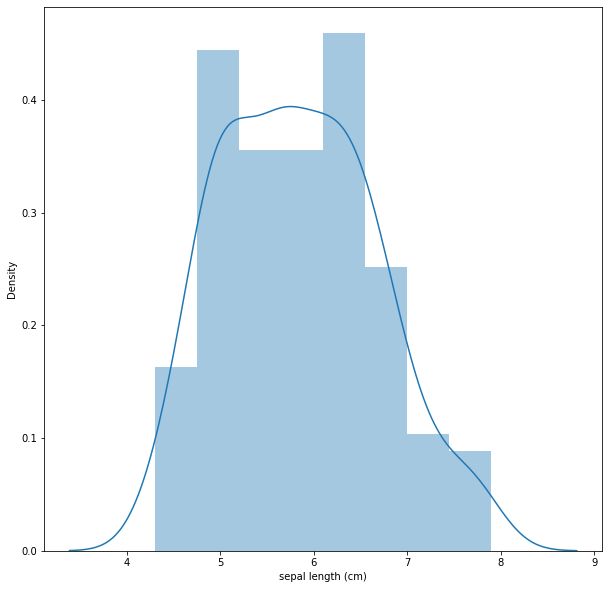

In [26]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(frame_ir['sepal length (cm)'])

### **Диаграмма рассеяния**

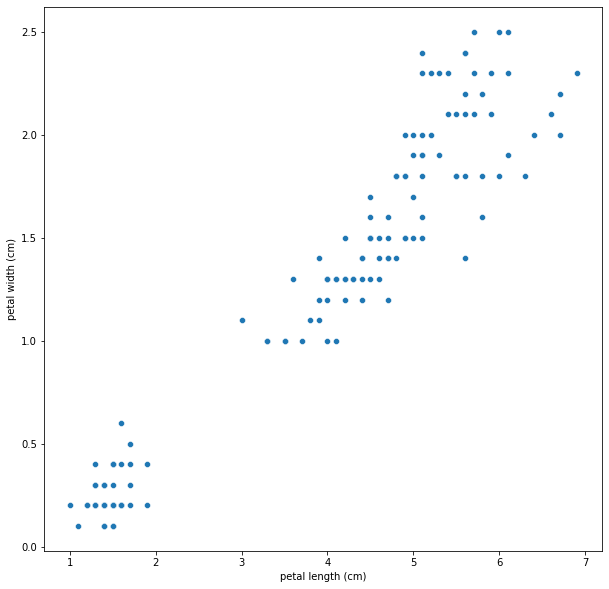

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='petal length (cm)', y='petal width (cm)', data=frame_ir)

## **4) Информация о корреляции признаков**

In [33]:
frame_ir.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:

*   Целевой признак наиболее сильно коррелирует с длиной лепестка (0.96) и с шириной лепестка (0.95). Эти признаки обязательно следует оставить в модели.
*   Целевой признак достаточно сильно коррелирует с длиной чашелистника (0.8). Этот признак стоит также оставить в модели.
*   Целевой признак слабо коррелирует с шириной чашелистника (-0.43). Скорее всего этот признак стоит исключить из модели, поскольку они могут ухудшить её качество.
*   Длина и ширина лепестка очень сильно коррелируют между собой (0.96), поэтому в модели необходимо оставить только один. На основании анализа кореляции с целевым признаком, оставим тот, который больше с ним коррелирует, а именно шиниру лепестка.



Попробуем использовать "тепловую карту", которая показывает степень корреляции различными цветами.

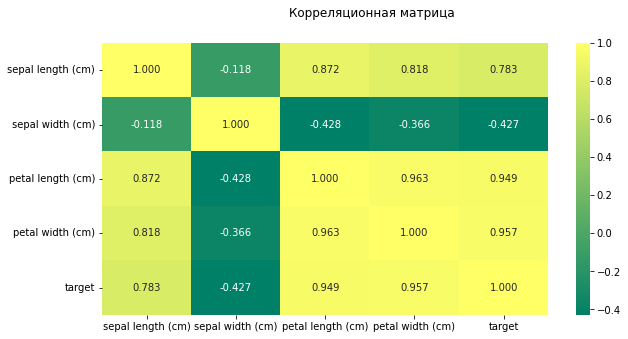

In [44]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(frame_ir.corr(), cmap='summer', annot=True, fmt='.3f')

Треугольный вариант матрицы:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


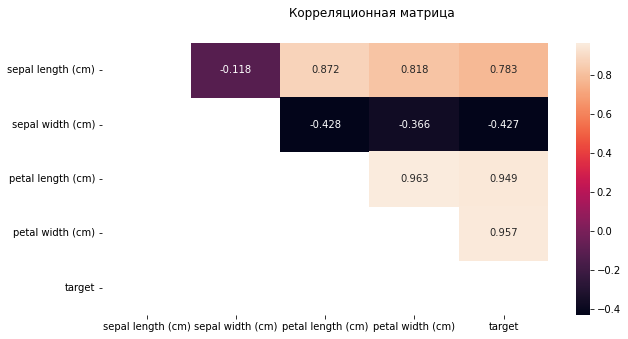

In [45]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
mask = np.zeros_like(frame_ir.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(frame_ir.corr(), mask=mask, annot=True, fmt='.3f')